# Data Processing Experiments

## 1. Setup và Import

In [1]:
import sys
sys.path.append('..')

from src.data.preprocessing import DataPreprocessor
from src.data.chunking import DocumentChunker
from src.retrieval.vector_store import VectorStore

from pathlib import Path
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

/home/huy/anaconda3/envs/characterAI/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Load và Preprocessing Data

In [2]:
# Load and process sample novel
SAMPLE_PATH = '../data/raw/novels/Harry Potter and the Chamber of Secrets.txt'

def display_sample_chapter(chapters, chapter_idx=0, sample_length=500):
    """Helper function to display chapter sample"""
    if chapters and len(chapters) > chapter_idx:
        chapter = chapters[chapter_idx]
        print(f"Chapter {chapter['chapter_number']}: {chapter['title']}")
        print(f"Length: {chapter['length']} characters")
        print(f"\nSample text:\n{chapter['text'][:sample_length]}...")
    else:
        print("No chapters found or invalid chapter index")

try:
    # Initialize preprocessor
    preprocessor = DataPreprocessor(Path('../data/raw'))
    
    # Read and preprocess the file
    with open(SAMPLE_PATH, 'r', encoding='utf-8') as f:
        raw_text = f.read()
    
    # Process the text into chapters
    chapters = preprocessor.process_novel(SAMPLE_PATH)
    
    # Display results
    print(f"Successfully processed {len(chapters)} chapters\n")
    display_sample_chapter(chapters)
    
except FileNotFoundError:
    print(f"Error: File not found at {SAMPLE_PATH}")
    print("Please ensure the novel file exists in the correct location")
except Exception as e:
    print(f"Error processing novel: {str(e)}")

INFO:src.data.preprocessing:Processed 18 chapters from ../data/raw/novels/Harry Potter and the Chamber of Secrets.txt


Successfully processed 18 chapters

Chapter 1: The Worst Birthday
Length: 14563 characters

Sample text:
Not for the first time, an argument had broken out over breakfast at number four, Privet Drive. Mr. Vernon Dursley had been woken in the early hours of the morning by a loud, hooting noise from his nephew Harry’s room. “Third time this week!” he roared across the table. “If you can’t control that owl, it’ll have to go!” Harry tried, yet again, to explain. “She’s bored,” he said. “She’s used to flying around outside. If I could just let her out at night —” “Do I look stupid?” snarled Uncle Vernon...


In [3]:
chapters[0]['text']

'Not for the first time, an argument had broken out over breakfast at number four, Privet Drive. Mr. Vernon Dursley had been woken in the early hours of the morning by a loud, hooting noise from his nephew Harry’s room. “Third time this week!” he roared across the table. “If you can’t control that owl, it’ll have to go!” Harry tried, yet again, to explain. “She’s bored,” he said. “She’s used to flying around outside. If I could just let her out at night —” “Do I look stupid?” snarled Uncle Vernon, a bit of fried egg dangling from his bushy mustache. “I know what’ll happen if that owl’s let out.” He exchanged dark looks with his wife, Petunia. Harry tried to argue back but his words were drowned by a long, loud belch from the Dursleys’ son, Dudley. “I want more bacon.” “There’s more in the frying pan, sweetums,” said Aunt Petunia, turning misty eyes on her massive son. “We must build you up while we’ve got the chance. … I don’t like the sound of that school food. …” “Nonsense, Petunia, 

### 2.1 Phân tích độ dài chapters

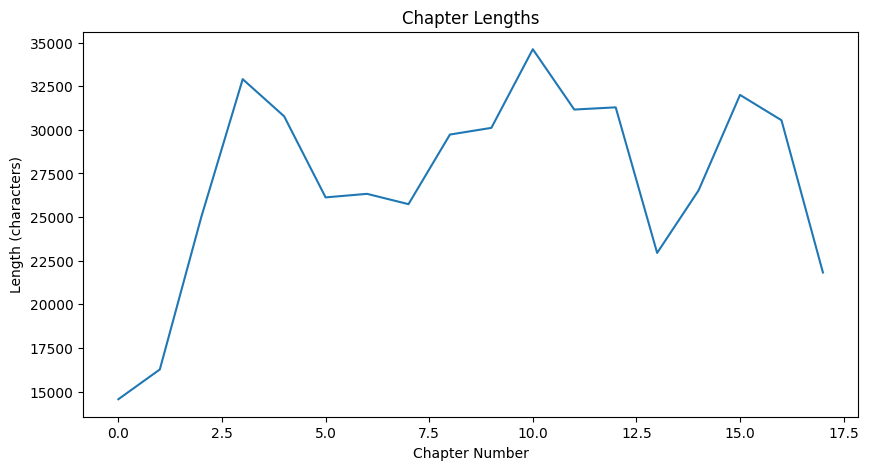

Average chapter length: 27135 characters
Std dev: 5360 characters


In [4]:
chapter_lengths = [chapter["length"] for chapter in chapters]

plt.figure(figsize=(10, 5))
plt.plot(chapter_lengths)
plt.title('Chapter Lengths')
plt.xlabel('Chapter Number')
plt.ylabel('Length (characters)')
plt.show()

print(f"Average chapter length: {np.mean(chapter_lengths):.0f} characters")
print(f"Std dev: {np.std(chapter_lengths):.0f} characters")

## 3. Chunking Experiments

In [3]:
# Initialize chunker with Gemini API
chunker = DocumentChunker()

# Test with first chapter
test_chapter = chapters[0]
print(f"Processing Chapter: {test_chapter['title']}\n")

# Create chunks using Gemini
chunks = chunker.create_chunks(test_chapter)

# Display results
for i, chunk in enumerate(chunks):
    print(f"\nChunk {i+1}:")
    print(f"Length: {len(chunk['text'])} characters")
    print("\nSummary:")
    print(chunk['summary'])
    print("\nText preview:")
    print(chunk['text'][:200] + "...")
    print("-" * 80)

# Process all chapters if the test looks good
# all_chunks = chunker.chunk_chapters(chapters)

INFO:src.data.chunking:Successfully initialized Gemini model


Processing Chapter: The Worst Birthday



INFO:src.data.chunking:Successfully created 11 chunks for Chapter 1



Chunk 1:
Length: 2233 characters

Summary:
Harry is berated by his uncle Vernon for mentioning magic at breakfast. The Dursleys are terrified of magic and Harry's wizarding abilities.

Text preview:
Not for the first time, an argument had broken out over breakfast at number four, Privet Drive. Mr. Vernon Dursley had been woken in the early hours of the morning by a loud, hooting noise from his ne...
--------------------------------------------------------------------------------

Chunk 2:
Length: 1744 characters

Summary:
Harry is miserable being back with the Dursleys, missing Hogwarts and his friends. The Dursleys are ashamed of Harry being a wizard and do everything they can to keep him from practicing magic or connecting with the wizarding world.

Text preview:
Ever since Harry had come home for the summer holidays, Uncle Vernon had been treating him like a bomb that might go off at any moment, because Harry Potter wasn’t a normal boy. As a matter of fact, h...
-------------------

## 4. Vector Search Testing

In [ ]:
# Initialize vector store
vector_store = VectorStore('../data/embeddings')

# Add chunks to vector store
documents = [chunk['text'] for chunk in chunks]
metadatas = [chunk['metadata'] for chunk in chunks]
ids = [f"chunk_{i}" for i in range(len(chunks))]

vector_store.add_documents(
    collection_name="novels",
    documents=documents,
    metadatas=metadatas,
    ids=ids
)

In [ ]:
# Test queries
test_queries = [
    "Harry's first day at Hogwarts",
    "Conversation with Ron",
    "Description of magic spells"
]

for query in test_queries:
    print(f"\nQuery: {query}")
    results = vector_store.search("novels", query)
    
    for i, (doc, score) in enumerate(zip(results['documents'][0], results['distances'][0])):
        print(f"\nResult {i+1} (score: {score:.3f}):\n{doc[:200]}...")

## 5. Phân tích kết quả

### Observations:
1. Chunk size và overlap:
   - ...
   
2. Chất lượng chunks:
   - ...
   
3. Vector search:
   - ...

### Recommendations:
1. ...
2. ...
3. ...